In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
from functools import reduce

In [220]:
lambda_list=['1', '5e-1', '1e-1', '5e-2', '1e-2', '5e-3', '1e-3']

In [228]:
def get_test_loss(solver):
    data_frames = []
    for l2 in lambda_list:
        log = "sol_"+ solver +"_gpu_0_l2_"+ l2 +"_d_40_t_100_eta_0.3_cgt_20.csv"
        df = pd.read_csv(log)
        df = df[["iter", "test_loss"]]
        df = df.rename(columns = {'test_loss': l2})
        data_frames.append(df)
    return reduce(lambda left,right: pd.merge(left,right,on=['iter'], how='outer'), data_frames)

In [222]:
data0 = get_test_loss('0').drop(columns=['iter']).min().to_frame(name="Gauss")
data0.head()

,Gauss
1,1.353823
5e-1,1.041315
1e-1,0.857668
5e-2,0.850166
1e-2,0.899916


In [223]:
data1 = get_test_loss('1').drop(columns=['iter']).min().to_frame(name="ALSCG")
data1.head()

,ALSCG
1,1.353784
5e-1,1.039801
1e-1,0.857550
5e-2,0.846197
1e-2,0.902221


In [224]:
data = pd.merge(data0, data1, left_index=True, right_index=True)
data = data.reset_index()
data = data.rename(columns = {"index": "lambda"})
data.head()

,lambda,Gauss,ALSCG
0,1,1.353823,1.353784
1,5e-1,1.041315,1.039801
2,1e-1,0.857668,0.857550
3,5e-2,0.850166,0.846197
4,1e-2,0.899916,0.902221


In [225]:
data = data.melt(id_vars="lambda", var_name="Solver", value_name="RMSE")
data.head()

,lambda,Solver,RMSE
0,1,Gauss,1.353823
1,5e-1,Gauss,1.041315
2,1e-1,Gauss,0.857668
3,5e-2,Gauss,0.850166
4,1e-2,Gauss,0.899916


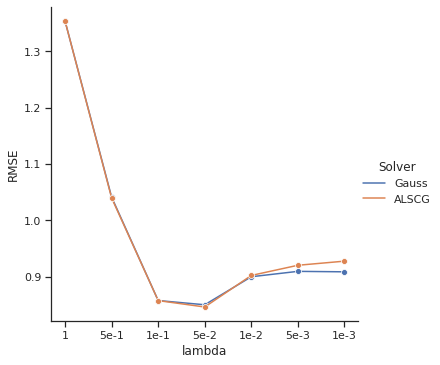

In [226]:
g = sns.relplot(x="lambda", y="RMSE", hue="Solver", kind="line", marker='o', data=data)

In [227]:
g.savefig("fig7.png")